# Project - 2
# Name: Akhilender Kaukuntla
Net-ID: AXK22014

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import category_encoders as ce
import joblib

%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
SBA = pd.read_csv('/Users/akhilenderk/Desktop/Applied_Machine_learning/Projects/Project-2/SBA_loans_project_2.csv')
SBA.head()

,index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,0,NEW YORK,NY,10003,JPMORGAN CHASE BANK NATL ASSOC,IL,561439,9,1.0,1,9,1,1,0,N,68000.0,0.0,68000.0,34000.0,0
1,1,PAWTUCKET,RI,2860,CITIZENS BANK NATL ASSOC,RI,541810,8,1.0,4,12,0,1,N,N,90000.0,0.0,90000.0,45000.0,1
2,2,ISSAQUAH,WA,98027,FIRST-CITIZENS BK & TR CO,WA,448210,9,2.0,0,0,1,0,N,N,450000.0,0.0,450000.0,337500.0,0
3,3,HURST,TX,76053,WILSHIRE BANK,CA,722213,4,1.0,0,4,1,1,0,N,140000.0,0.0,165000.0,82500.0,0
4,4,ALPINE,CA,91901,CALIFORNIA BANK & TRUST,CA,233210,1,1.0,0,1,1,2,Y,N,50000.0,0.0,50000.0,25000.0,0


In [4]:
cat_cols = ['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc']
num_cols = ['Zip', 'NAICS', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural']
SBA[cat_cols] = SBA[cat_cols].fillna("missing")
SBA[num_cols] = SBA[num_cols].fillna(0)

In [5]:
def convert_to_float(value):
    if isinstance(value, str):
        return float(value.replace('$', '').replace(',', ''))
    return value
columns_to_convert = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']
for column in columns_to_convert:
    SBA[column] = SBA[column].apply(convert_to_float)
print(SBA.dtypes)

index                  int64
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementGross    float64
BalanceGross         float64
GrAppv               float64
SBA_Appv             float64
MIS_Status             int64
dtype: object


In [6]:
print(SBA.isnull().sum())

index                0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
MIS_Status           0
dtype: int64


/Users/akhilenderk/opt/anaconda3/envs/ml-fall-2023/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/akhilenderk/opt/anaconda3/envs/ml-fall-2023/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/akhilenderk/opt/anaconda3/envs/ml-fall-2023/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/akhilenderk/opt/anaconda3/envs/ml-fall-2023/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

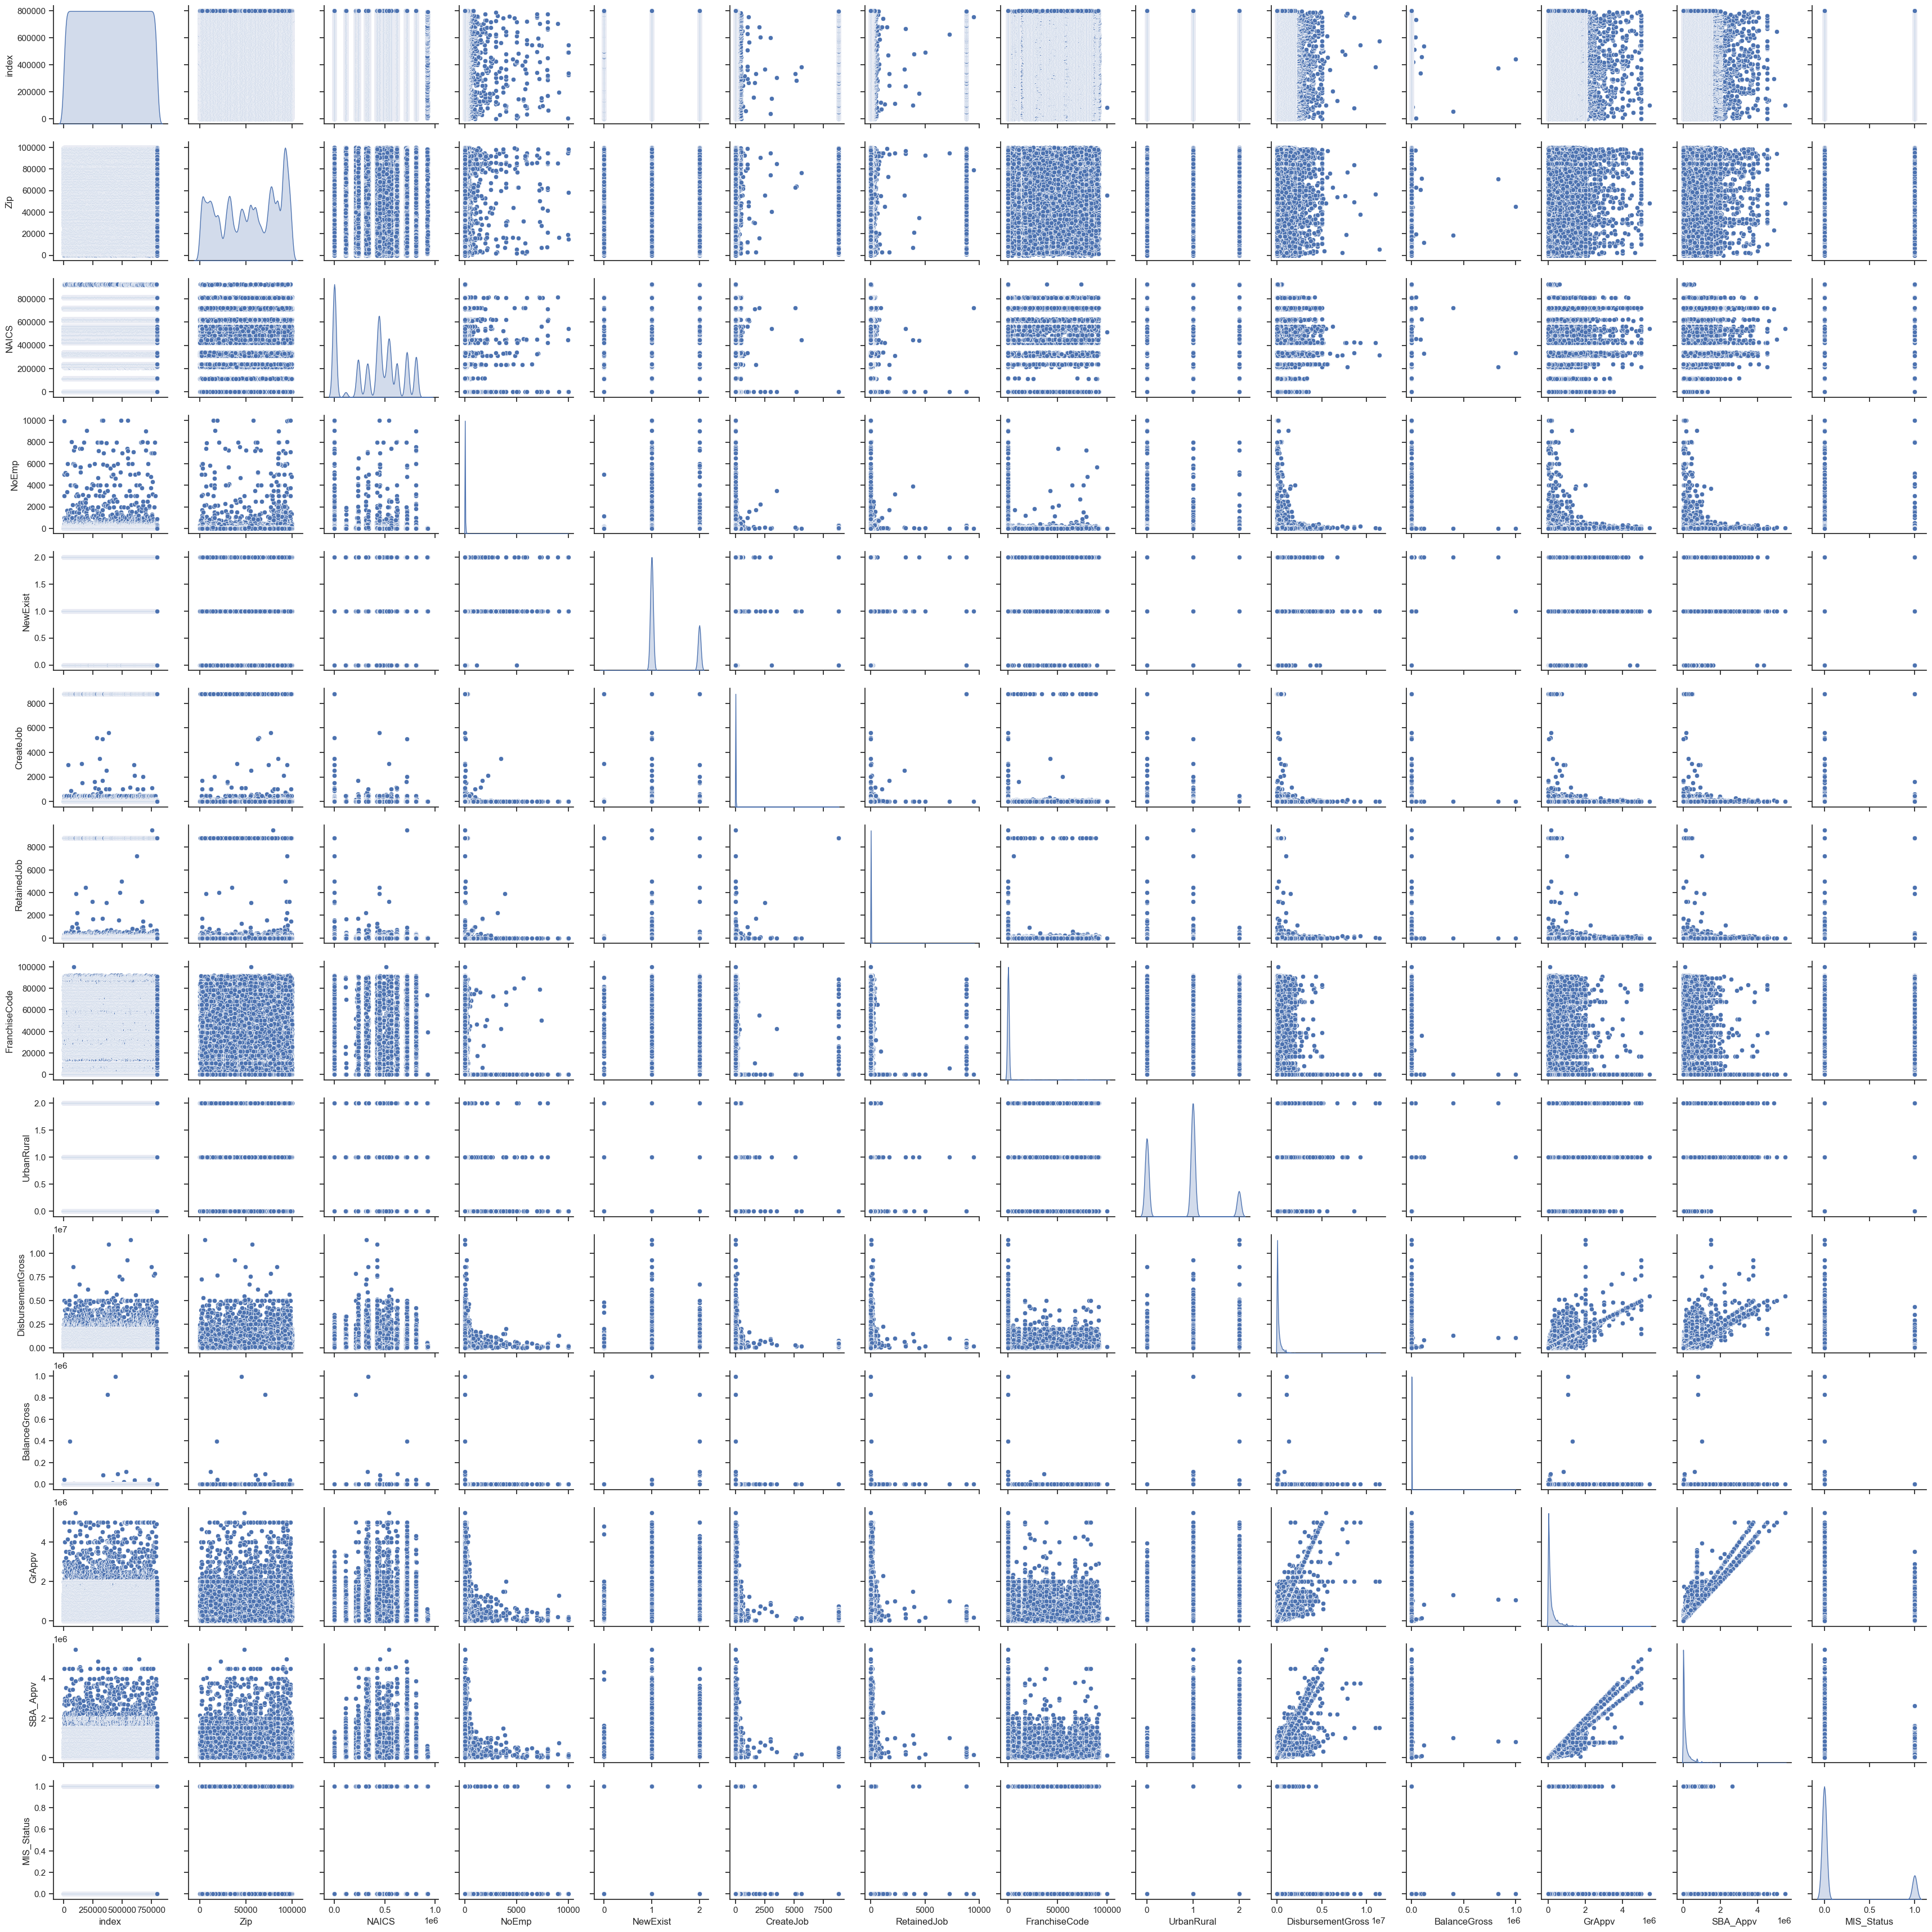

In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set(style= 'ticks')
sns.pairplot(SBA, diag_kind='kde')

plt.show()

- I am using Seaborn Pairplot as it essential to identify pairwise relationships between variables within the datasets.

In [8]:
SBA.columns

Index(['index', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv',
       'SBA_Appv', 'MIS_Status'],
      dtype='object')

In [9]:
#Encoding Categorical Data
import pandas as pd
import category_encoders as ce
cat_cols = ['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc']
te = ce.TargetEncoder(cols=cat_cols)
te.fit(SBA[cat_cols], SBA['MIS_Status'])
SBA_trg_enc = te.transform(SBA[cat_cols]).add_suffix('_trg')
# merge encoded data with original data
SBA = pd.concat([SBA.drop(cat_cols, axis=1), SBA_trg_enc], axis=1)

/Users/akhilenderk/opt/anaconda3/envs/ml-fall-2023/lib/python3.10/site-packages/category_encoders/utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
/Users/akhilenderk/opt/anaconda3/envs/ml-fall-2023/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Users/akhilenderk/opt/anaconda3/envs/ml-fall-2023/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Users/akhilenderk/opt/anaconda3/envs/ml-fall-2023/lib/python3.10/site-packages/category_encoders/util

In [10]:
SBA.head(5)

,index,Zip,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status,City_trg,State_trg,Bank_trg,BankState_trg,RevLineCr_trg,LowDoc_trg
0,0,10003,561439,9,1.0,1,9,1,1,68000.0,0.0,68000.0,34000.0,0,0.218389,0.198556,0.274998,0.222940,0.149117,0.18651
1,1,2860,541810,8,1.0,4,12,0,1,90000.0,0.0,90000.0,45000.0,1,0.118863,0.113537,0.216130,0.198714,0.146062,0.18651
2,2,98027,448210,9,2.0,0,0,1,0,450000.0,0.0,450000.0,337500.0,0,0.166667,0.140687,0.114769,0.076157,0.146062,0.18651
3,3,76053,722213,4,1.0,0,4,1,1,140000.0,0.0,165000.0,82500.0,0,0.237838,0.187879,0.133182,0.219918,0.149117,0.18651
4,4,91901,233210,1,1.0,0,1,1,2,50000.0,0.0,50000.0,25000.0,0,0.237288,0.184745,0.212194,0.219918,0.253017,0.18651


In [11]:
# Feature Engineering generating 10 new features. These features are based on the feature engineering done in Project-1.


# 1. Interaction Features
SBA['Noemp_createJob'] = SBA['NoEmp'] * SBA['CreateJob']

# 2. Logarithmic Transformation
SBA['LogGrAppv'] = np.log(SBA['GrAppv'] + 1)  # Adding 1 to handle zero values

# 3. Ratio Feature
SBA['SBA_Appv_to_GrAppv_Ratio'] = SBA['SBA_Appv'] / SBA['GrAppv']


# 4. Aggregated Statistics (mean 'DisbursementGross' by 'City')
mean_disbursement_by_city = SBA.groupby('City_trg')['DisbursementGross'].mean()
SBA['MeanDisbursementByCity'] = SBA['City_trg'].map(mean_disbursement_by_city)

# 5. Combined Features
SBA['Emp_Job_Combined'] = SBA['NoEmp'] + SBA['CreateJob']

# 6. Difference Feature
SBA['GrAppv_minus_SBA_Appv'] = SBA['GrAppv'] - SBA['SBA_Appv']


# 7. Polynomial Features (Squared features for selected columns)
squared_columns = ['NoEmp', 'CreateJob', 'DisbursementGross', 'GrAppv']
for column in squared_columns:
    SBA[f'{column}_squared'] = SBA[column] ** 2

# 8. Binary Indicator Features (based on 'RevLineCr' and 'LowDoc')
SBA['RevLineCr_Indicator'] = (SBA['RevLineCr_trg'] == 'Y').astype(int)

SBA['LowDoc_Indicator'] = (SBA['LowDoc_trg'] == 'Y').astype(int)


# 9. Aggregated Statistics (mean 'GrAppv' by 'NAICS')
mean_grappv_by_naics = SBA.groupby('NAICS')['GrAppv'].mean()
SBA['MeanGrAppvByNAICS'] = SBA['NAICS'].map(mean_grappv_by_naics)

# 10. Count-Based Feature (count of 'State' occurrences)
state_count = SBA['State_trg'].value_counts()
SBA['State_Count'] = SBA['State_trg'].map(state_count)


- The above cell is the step where I added the 10 new synthetic features based on the existing features.

In [12]:
target_col = 'MIS_Status'
X = SBA.drop(columns=[target_col], axis = 1)
y = SBA[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

/Users/akhilenderk/opt/anaconda3/envs/ml-fall-2023/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/akhilenderk/opt/anaconda3/envs/ml-fall-2023/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [18]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
h2o.init()
h2o_df_train = h2o.H2OFrame(X_train.assign(target=y_train))
h2o_df_test = h2o.H2OFrame(X_test.assign(target=y_test))
gbm_params = {
    'learn_rate': np.arange(0.01,0.2,0.02).tolist(),
    'max_depth': [5,7,9],
    'sample_rate': [1.0],
    'ntrees': [50,100,150]
}
gbm = H2OGradientBoostingEstimator(seed=42)
grid = H2OGridSearch(gbm, hyper_params=gbm_params, search_criteria={'strategy': 'RandomDiscrete', 'max_models': 150, 'seed': 42})
grid.train(x=h2o_df_train.columns[:-1], y='target', training_frame=h2o_df_train)
best_model = grid.get_grid()[0]
y_pred_prob = best_model.predict(h2o_df_test).as_data_frame()['predict']
y_pred = (y_pred_prob > 0.5).astype(int)
f1_macro = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)
print(f'GBM Model Performance on Test Data:')
print(f'F1 Score (macro): {f1_macro}')
print(f'AUC: {auc}')
print(f'Confusion Matrix:')
print(cm)
print(f'Best Hyperparameters: {best_model.params}')

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,1 hour 1 min
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,4 months and 15 days
H2O_cluster_name:,H2O_from_python_akhilenderk_7ptbr2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.178 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
GBM Model Performance on Test Data:
F1 Score (macro): 0.6801229004865749
AUC: 0.84282833718484
Confusion Matrix:
[[128231   3792]
 [ 19004   9024]]
Best Hyperparameters: {'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'Grid_GBM_Key_Frame__upload_91dc93645f3a6cef7b0cca725aeb4788.hex_model_python_1702255793028_5_model_51', 'type': 'Key<Model>', 'URL': '/3/Models/Grid_GBM_Key_Frame__upload_91dc93645f3a6cef7b0cca725aeb4788.hex_model_python_1702255793028_5_model_51'}, 'input': None}, 'training_frame': {'default': None, 'actual

/Users/akhilenderk/opt/anaconda3/envs/ml-fall-2023/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/akhilenderk/opt/anaconda3/envs/ml-fall-2023/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/akhilenderk/opt/anaconda3/envs/ml-fall-2023/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/akhilenderk/opt/anaconda3/envs/ml-fall-2023/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is depreca

- The H2O GBM model is trained and its metrics are mentioned above. The metric used in this case is AUC(Area Under Curve) metric. This metric is choosen because Accuracy can often be misleading for large imbalanced datasets. AUC would be appropriate metric to use for GBM models as it considers the performance across all possible classification thresholds rather than a single one like Accuracy.

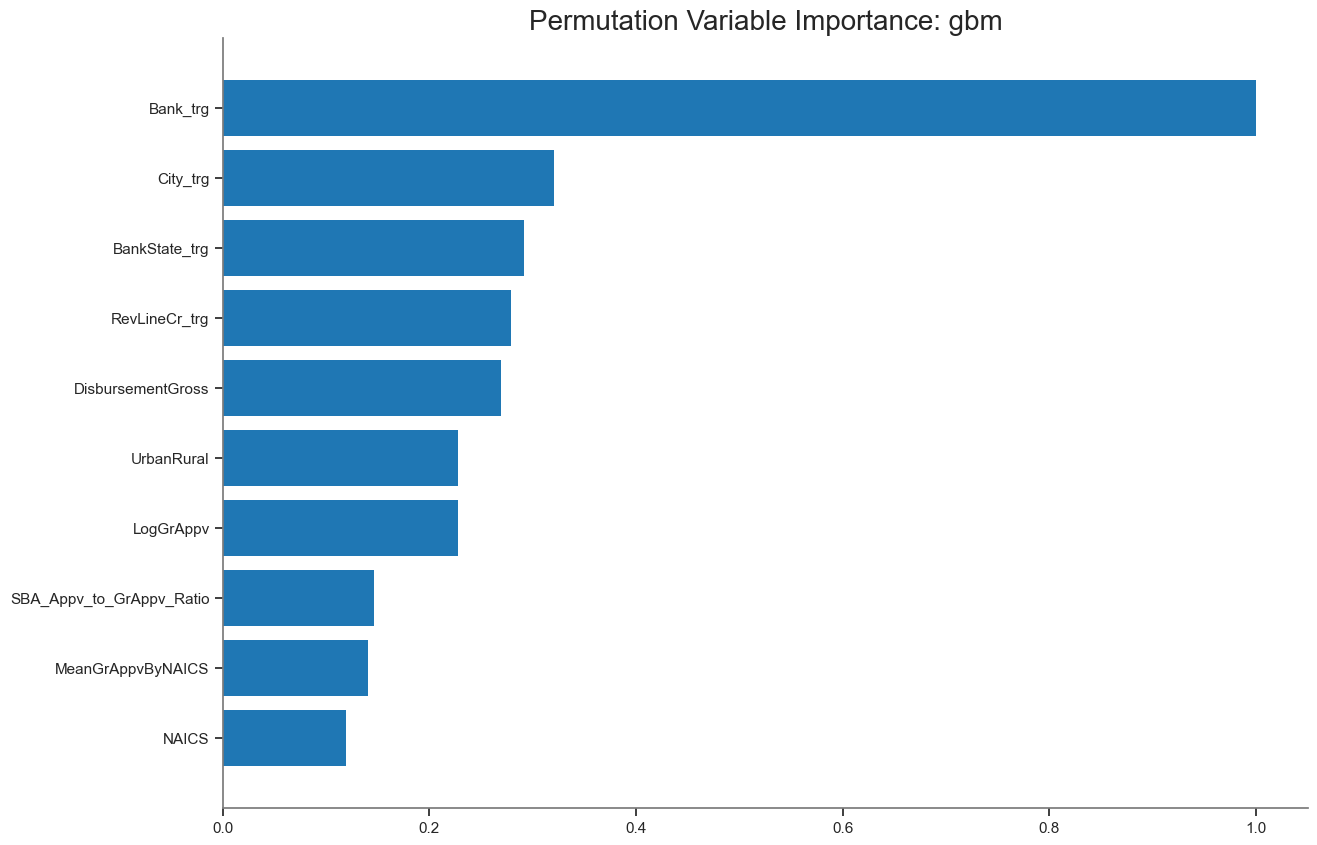

Variable,Relative Importance,Scaled Importance,Percentage
Bank_trg,0.0471770,1.0,0.2787953
City_trg,0.0151161,0.3204132,0.0893297
BankState_trg,0.0137678,0.2918327,0.0813616
RevLineCr_trg,0.0131447,0.2786255,0.0776795
DisbursementGross,0.0127193,0.2696086,0.0751656
UrbanRural,0.0107537,0.2279438,0.0635497
LogGrAppv,0.0107252,0.2273394,0.0633812
SBA_Appv_to_GrAppv_Ratio,0.0069225,0.1467355,0.0409092
MeanGrAppvByNAICS,0.0066127,0.1401684,0.0390783
NAICS,0.0056317,0.1193739,0.0332809


In [20]:
best_model.permutation_importance_plot(h2o_df_train)

- The above code shows the Variable Feature importance of the dataset and its plot

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

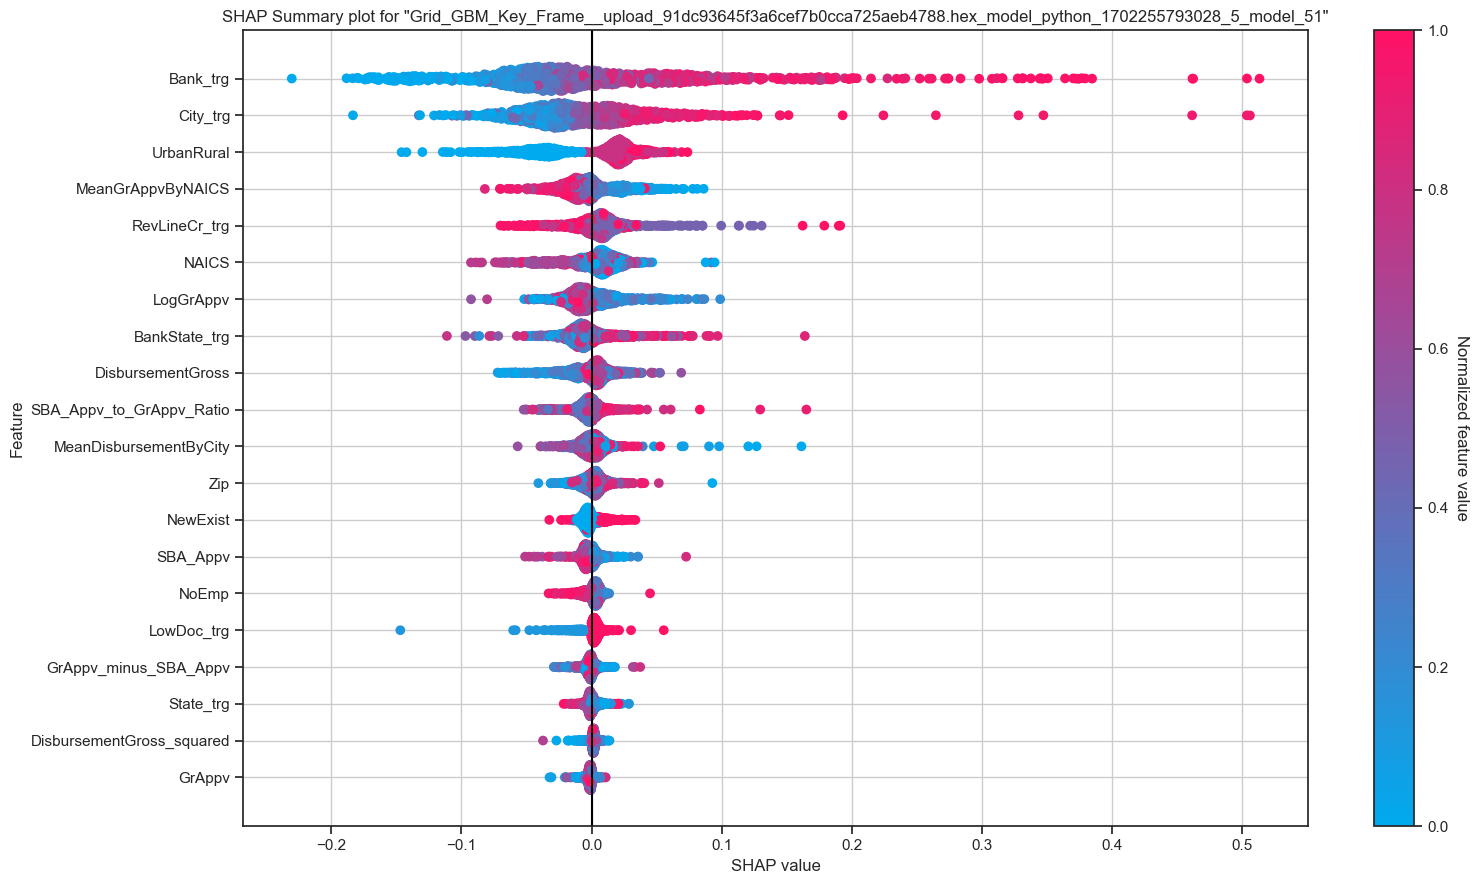

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

In [21]:
shap_values =  best_model.explain(h2o_df_train,include_explanations='shap_summary')
shap_values

- As plotted using SHAP values we can understand that Bank, city, Urban Rural, MeanGrAppvByNAICS, RevlineCr are the top features that are impacting the model's prediction factors.

In [22]:
import joblib
#Save H2O model
h2o.save_model(best_model, 
               path="/Users/akhilenderk/Desktop/Applied_Machine_Learning/Projects/Project-2/Akhilender_Kaukuntla_AXK220104_Deliverables_Project2/Artifacts", 
               force=True)
#Save target encoder
joblib.dump(te, open('/Users/akhilenderk/Desktop/Applied_Machine_Learning/Projects/Project-2/Akhilender_Kaukuntla_AXK220104_Deliverables_Project2/Artifacts/encoder.pkl','wb'))

# Project Summary:

## Summary of Work:
 Building and evaluating a binary classification model using H2O's Gradient Boosting Machiner (GBM) a for a dataset related to Small Business Administration (SBA) loans. The process involved data preprocessing, feature engineering, and model evaluation. We also explored various aspects of the model, including AUC-PR and F1 score.

## Key Findings:
1. The dataset contained information about small business loans, including features such as location, loan details, and approval status.
2. We observed that the dataset had missing values, which were handled through imputation using the mean.
3. Categorical features were encoded using target encoding from the Category Encoders library to prepare them for modeling.
4. We generated new features, including interaction features, logarithmic transformations, and ratio features.
5. The H2O GBM model was trained, and the best model's AUCPR and F1 Scores were calculated.

## Summary of Models:
 The models used in this project are H2O GBM.
 I would concrete on the point that the H2O widely used in the same finance industry that this data is based out of giving a real life like reason to work and understand industry benchmark framework.
 
 H2O GBM model is efficent and it also is very less demanding on the CPU cores, battery and thermals.

## Recommendations:
1. The model's performance is high compared to the previous implementation during Project-1  this is achieved by improved fine-tuning of hyperparameters and considering additional feature engineering along with now a little bit of domain knowledge of the data.
2. Continue monitoring and updating the model with new data for ongoing accuracy would further increase the scope of this project.

